## Etapa que compara medidas de tendência central (média, mediana e moda)
- Também inclui comparação de boxplots

In [47]:
import pandas as pd

df = pd.read_csv("data/titanic.csv")

def dividir_grupos(df, target_col):
    if df[target_col].dtype == 'int64':
        grupo_1 = df[df[target_col] == 1]
        grupo_0 = df[df[target_col] == 0]
        
    else:
        grupo_1 = df[df[target_col] == 'Yes']
        grupo_0 = df[df[target_col] == 'No']
    
    return grupo_1, grupo_0

grupo_1, grupo_0 = dividir_grupos(df, 'Survived')
grupo_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


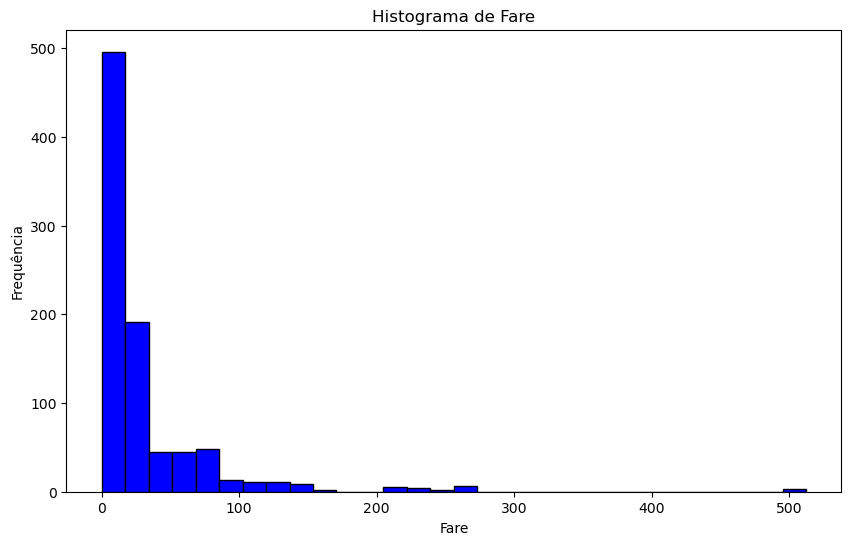

In [48]:
import matplotlib.pyplot as plt

# Definir o tamanho da figura
plt.figure(figsize=(10, 6))

# Criar o histograma para a coluna 'Fare'
plt.hist(df['Fare'], bins=30, color='blue', edgecolor='black')

# Adicionar título e rótulos aos eixos
plt.title('Histograma de Fare')
plt.xlabel('Fare')
plt.ylabel('Frequência')

# Exibir o gráfico
plt.show()


## Funções e uso

In [19]:
def comparar_medias(grupo_1, grupo_0, var_numerica):
    media_grupo_1 = grupo_1[var_numerica].mean()
    media_grupo_0 = grupo_0[var_numerica].mean()
    return media_grupo_1, media_grupo_0


#uso: media_grupo1, media_grupo0 = comparar_medias(grupo_1, grupo_0, 'Fare')
#print(media_grupo1, media_grupo0)

In [20]:
def comparar_mediana(grupo_1, grupo_0, var_numerica):
    mediana_grupo_1 = grupo_1[var_numerica].median()
    mediana_grupo_0 = grupo_0[var_numerica].median()
    return mediana_grupo_1, mediana_grupo_0


#uso: mediana_grupo_1, mediana_grupo_0 = comparar_mediana(grupo_1, grupo_0, 'Fare')
#print(mediana_grupo_1, mediana_grupo_0)

In [21]:
def comparar_moda(grupo_1, grupo_0, var_numerica):
    moda_grupo_1 = grupo_1[var_numerica].mode()
    moda_grupo_0 = grupo_0[var_numerica].mode()
    return moda_grupo_1, moda_grupo_0

#uso: moda_grupo_1, moda_grupo_0 = comparar_moda(grupo_1, grupo_0, 'Fare')
#print(moda_grupo_1, moda_grupo_0)

### Comparando todas juntas

In [43]:
def comparar_medidas_tendencia_central(grupo_1, grupo_0, var_numerica, grupo_1_label='Grupo 1', grupo_0_label='Grupo 0'):
    # Calcular médias
    media_grupo_1 = grupo_1[var_numerica].mean()
    media_grupo_0 = grupo_0[var_numerica].mean()
    
    # Calcular medianas
    mediana_grupo_1 = grupo_1[var_numerica].median()
    mediana_grupo_0 = grupo_0[var_numerica].median()
    
    # Calcular modas
    moda_grupo_1 = grupo_1[var_numerica].mode()
    moda_grupo_0 = grupo_0[var_numerica].mode()

    # Exibir os resultados de forma clara
    print(f"Comparação de {var_numerica} entre {grupo_1_label} e {grupo_0_label}:")
    print(f"{grupo_1_label} - Média: {media_grupo_1:.2f}, Mediana: {mediana_grupo_1:.2f}, Moda: {moda_grupo_1.values}")
    print(f"{grupo_0_label} - Média: {media_grupo_0:.2f}, Mediana: {mediana_grupo_0:.2f}, Moda: {moda_grupo_0.values}")
    
    # Retornar os valores
    return {
        'media': (media_grupo_1, media_grupo_0),
        'mediana': (mediana_grupo_1, mediana_grupo_0),
        'moda': (moda_grupo_1.values, moda_grupo_0.values)
    }


In [46]:
#USO

grupo_1, grupo_0 = dividir_grupos(df, 'Survived')
resultados = comparar_medidas_tendencia_central(grupo_1, grupo_0, 'Fare', grupo_1_label='Sobreviveu', grupo_0_label='Não Sobreviveu')

# Acessando os resultados
print("Médias:", resultados['media'])
print("Medianas:", resultados['mediana'])
print("Modas:", resultados['moda'])


Comparação de Fare entre Sobreviveu e Não Sobreviveu:
Sobreviveu - Média: 48.40, Mediana: 26.00, Moda: [13.]
Não Sobreviveu - Média: 22.12, Mediana: 10.50, Moda: [8.05]
Médias: (48.39540760233918, 22.117886885245902)
Medianas: (26.0, 10.5)
Modas: (array([13.]), array([8.05]))


### Comparando boxplots

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
def boxplot_comparacao(grupo_1, grupo_0, var_numerica, grupo_1_label='Grupo 1', grupo_0_label='Grupo 0'):
    temp_df = pd.DataFrame({
        var_numerica: pd.concat([grupo_1[var_numerica], grupo_0[var_numerica]]),
        'Grupo': [grupo_1_label] * len(grupo_1) + [grupo_0_label] * len(grupo_0)
    })

    sns.boxplot(x='Grupo', y=var_numerica, data=temp_df)
    plt.title(f'Comparação de {var_numerica} entre {grupo_1_label} e {grupo_0_label}')
    plt.show()

#exemplo de uso:
#boxplot_comparacao(grupo_1, grupo_0, 'Age', grupo_1_label='Rotacionou', grupo_0_label='Não Rotacionou')

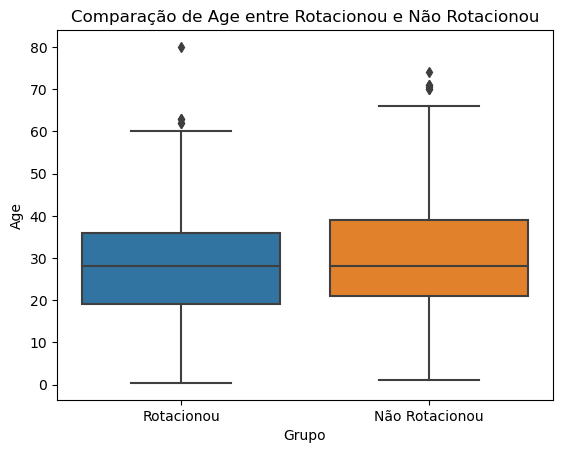

In [48]:
boxplot_comparacao(grupo_1, grupo_0, 'Age', grupo_1_label='Rotacionou', grupo_0_label='Não Rotacionou')